# import section
We need matplotlib for visualization ans numpy for random data generation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy.core.multiarray import ndarray

# Fake data generation

In [2]:
def data_maker(num=80):
    X = np.arange(0, num, dtype=np.float32)
    Y = np.float32(np.ceil(5 * (np.sin(X) + X / 5)))
    return X, Y

In [3]:
data = data_maker(60)
data

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59.], dtype=float32),
 array([ 0.,  6.,  7.,  4.,  1.,  1.,  5., 11., 13., 12.,  8.,  7., 10.,
        16., 19., 19., 15., 13., 15., 20., 25., 26., 22., 19., 20., 25.,
        30., 32., 30., 26., 26., 29., 35., 38., 37., 33., 32., 34., 40.,
        44., 44., 41., 38., 39., 45., 50., 51., 48., 45., 45., 49., 55.,
        57., 55., 52., 51., 54., 60., 63., 63.], dtype=float32))

# Visualize with random parameter

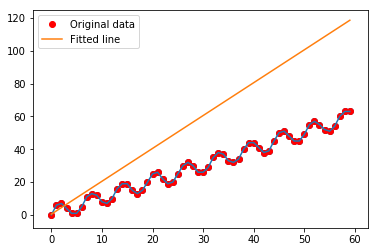

In [4]:
def visualize(a, b, train_X: ndarray, train_Y: ndarray):
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, train_Y)
    plt.plot(train_X, a * train_X + b, label='Fitted line')
    plt.scatter(train_X, train_Y)
    plt.legend()
    plt.show()
visualize(*((2,.5) + data))

# Define Linear Regression Class

In [5]:
class LinearRegression:
    def __init__(self, train_X: ndarray, train_Y: ndarray, learning_rate=0.001, training_epochs=100):
        self.train_X = train_X
        self.train_Y = train_Y
        self.learning_rate = learning_rate
        self.training_epochs = training_epochs

    def fit(self):
        x = tf.placeholder("float")
        y = tf.placeholder("float")
        
        a = tf.Variable(1.0, name="weight")
        b = tf.Variable(1.0, name="bias")

        pred = tf.multiply(x, a) + b

        cost = tf.reduce_mean(tf.abs(pred - y))

        optimizer = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(cost)

        init = tf.initialize_all_variables()

        with tf.Session() as sess:
            sess.run(init)
            for epoch in range(self.training_epochs):
                for i, out in zip(self.train_X, self.train_Y):
                    sess.run(optimizer, feed_dict={x: i, y: out})
                    print("Epoch:", '%04d' % (epoch + 1), "cost=", "W=", sess.run(a), "b=", sess.run(b))
            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={x: self.train_X, y: self.train_Y})
            print("Training cost=", training_cost, "a=", sess.run(a), "b=", sess.run(b), '\n')
            return sess.run(a), sess.run(b)

In [6]:
regression = LinearRegression(*data_maker())
final_parameter = regression.fit()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= W= 1.0 b= 0.999
Epoch: 0001 cost= W= 1.001 b= 1.0
Epoch: 0001 cost= W= 1.003 b= 1.001
Epoch: 0001 cost= W= 1.0 b= 1.0
Epoch: 0001 cost= W= 0.996 b= 0.999
Epoch: 0001 cost= W= 0.991 b= 0.998
Epoch: 0001 cost= W= 0.985 b= 0.99700004
Epoch: 0001 cost= W= 0.99200004 b= 0.998
Epoch: 0001 cost= W= 1.0 b= 0.999
Epoch: 0001 cost= W= 1.009 b= 1.0
Epoch: 0001 cost= W= 0.99899995 b= 0.999
Epoch: 0001 cost= W= 0.988 b= 0.998
Epoch: 0001 cost= W= 0.97599995 b= 0.99700004
Epoch: 0001 cost= W= 0.98899996 b= 0.998
Epoch: 0001 cost= W= 1.003 b= 0.999
Epoch: 0001 cost= W= 1.018 b= 1.0
Epoch: 0001 cost= W= 1.002 b= 0.999
Epoch: 0001 cost= W= 0.98499995 b= 0.998
Epoch: 0001 cost= W= 0.96699995 b= 0.99700004
Epoch: 0001 cost= W= 0.98599994 b= 0.998
Epoch: 0001 cost= W= 1.0059999 b= 0.999
Epoch: 0001 cost= W= 1.027 b= 1.0
Epoch: 0001 cost= W= 1.005 b= 0.999
Epoch: 0001 cost= W= 0.982 b= 0.998
Epoch: 0001 cost= W= 0.9

Epoch: 0003 cost= W= 0.92299986 b= 0.998
Epoch: 0003 cost= W= 0.96099985 b= 0.999
Epoch: 0003 cost= W= 0.9999998 b= 1.0
Epoch: 0003 cost= W= 1.0399998 b= 1.001
Epoch: 0003 cost= W= 0.99899983 b= 1.0
Epoch: 0003 cost= W= 0.95699984 b= 0.999
Epoch: 0003 cost= W= 0.91399986 b= 0.998
Epoch: 0003 cost= W= 0.9579999 b= 0.999
Epoch: 0003 cost= W= 1.0029999 b= 1.0
Epoch: 0003 cost= W= 1.0489999 b= 1.001
Epoch: 0003 cost= W= 1.0019999 b= 1.0
Epoch: 0003 cost= W= 0.9539999 b= 0.999
Epoch: 0003 cost= W= 0.90499985 b= 0.998
Epoch: 0003 cost= W= 0.95499986 b= 0.999
Epoch: 0003 cost= W= 1.0059999 b= 1.0
Epoch: 0003 cost= W= 1.058 b= 1.001
Epoch: 0003 cost= W= 1.005 b= 1.0
Epoch: 0003 cost= W= 0.951 b= 0.999
Epoch: 0003 cost= W= 0.89599997 b= 0.998
Epoch: 0003 cost= W= 0.95199996 b= 0.999
Epoch: 0003 cost= W= 1.009 b= 1.0
Epoch: 0003 cost= W= 1.0669999 b= 1.001
Epoch: 0003 cost= W= 1.0079999 b= 1.0
Epoch: 0003 cost= W= 0.9479999 b= 0.999
Epoch: 0003 cost= W= 0.8869999 b= 0.998
Epoch: 0003 cost= W= 0.

Epoch: 0007 cost= W= 0.8949998 b= 0.9920001
Epoch: 0007 cost= W= 0.8769998 b= 0.9910001
Epoch: 0007 cost= W= 0.8959998 b= 0.9920001
Epoch: 0007 cost= W= 0.91599977 b= 0.9930001
Epoch: 0007 cost= W= 0.9369998 b= 0.9940001
Epoch: 0007 cost= W= 0.9589998 b= 0.99500006
Epoch: 0007 cost= W= 0.9359998 b= 0.9940001
Epoch: 0007 cost= W= 0.9119998 b= 0.9930001
Epoch: 0007 cost= W= 0.9369998 b= 0.9940001
Epoch: 0007 cost= W= 0.9629998 b= 0.99500006
Epoch: 0007 cost= W= 0.98999983 b= 0.99600005
Epoch: 0007 cost= W= 1.0179999 b= 0.99700004
Epoch: 0007 cost= W= 0.9889999 b= 0.99600005
Epoch: 0007 cost= W= 0.9589999 b= 0.99500006
Epoch: 0007 cost= W= 0.92799985 b= 0.9940001
Epoch: 0007 cost= W= 0.95999986 b= 0.99500006
Epoch: 0007 cost= W= 0.99299985 b= 0.99600005
Epoch: 0007 cost= W= 1.0269998 b= 0.99700004
Epoch: 0007 cost= W= 0.9919998 b= 0.99600005
Epoch: 0007 cost= W= 0.9559998 b= 0.99500006
Epoch: 0007 cost= W= 0.9189998 b= 0.9940001
Epoch: 0007 cost= W= 0.9569998 b= 0.99500006
Epoch: 0007 cos

Epoch: 0009 cost= W= 1.011 b= 0.9920001
Epoch: 0009 cost= W= 0.957 b= 0.9910001
Epoch: 0009 cost= W= 0.902 b= 0.9900001
Epoch: 0009 cost= W= 0.958 b= 0.9910001
Epoch: 0009 cost= W= 1.015 b= 0.9920001
Epoch: 0009 cost= W= 1.073 b= 0.9930001
Epoch: 0009 cost= W= 1.0139999 b= 0.9920001
Epoch: 0009 cost= W= 0.95399994 b= 0.9910001
Epoch: 0009 cost= W= 0.89299995 b= 0.9900001
Epoch: 0009 cost= W= 0.9549999 b= 0.9910001
Epoch: 0009 cost= W= 1.0179999 b= 0.9920001
Epoch: 0009 cost= W= 1.0819999 b= 0.9930001
Epoch: 0009 cost= W= 1.0169998 b= 0.9920001
Epoch: 0009 cost= W= 0.95099986 b= 0.9910001
Epoch: 0009 cost= W= 0.8839998 b= 0.9900001
Epoch: 0009 cost= W= 0.95199984 b= 0.9910001
Epoch: 0009 cost= W= 1.0209999 b= 0.9920001
Epoch: 0009 cost= W= 1.091 b= 0.9930001
Epoch: 0009 cost= W= 1.02 b= 0.9920001
Epoch: 0009 cost= W= 0.94799995 b= 0.9910001
Epoch: 0009 cost= W= 0.87499994 b= 0.9900001
Epoch: 0009 cost= W= 0.94899994 b= 0.9910001
Epoch: 0009 cost= W= 1.0239999 b= 0.9920001
Epoch: 0009 co

Epoch: 0012 cost= W= 0.8959998 b= 0.9860002
Epoch: 0012 cost= W= 0.91599977 b= 0.98700017
Epoch: 0012 cost= W= 0.9369998 b= 0.98800015
Epoch: 0012 cost= W= 0.9589998 b= 0.98900014
Epoch: 0012 cost= W= 0.9359998 b= 0.98800015
Epoch: 0012 cost= W= 0.9119998 b= 0.98700017
Epoch: 0012 cost= W= 0.9369998 b= 0.98800015
Epoch: 0012 cost= W= 0.9629998 b= 0.98900014
Epoch: 0012 cost= W= 0.98999983 b= 0.9900001
Epoch: 0012 cost= W= 1.0179999 b= 0.9910001
Epoch: 0012 cost= W= 0.9889999 b= 0.9900001
Epoch: 0012 cost= W= 0.9589999 b= 0.98900014
Epoch: 0012 cost= W= 0.92799985 b= 0.98800015
Epoch: 0012 cost= W= 0.95999986 b= 0.98900014
Epoch: 0012 cost= W= 0.99299985 b= 0.9900001
Epoch: 0012 cost= W= 1.0269998 b= 0.9910001
Epoch: 0012 cost= W= 0.9919998 b= 0.9900001
Epoch: 0012 cost= W= 0.9559998 b= 0.98900014
Epoch: 0012 cost= W= 0.9189998 b= 0.98800015
Epoch: 0012 cost= W= 0.9569998 b= 0.98900014
Epoch: 0012 cost= W= 0.99599975 b= 0.9900001
Epoch: 0012 cost= W= 1.0359998 b= 0.9910001
Epoch: 0012 c

Epoch: 0016 cost= W= 1.0500001 b= 0.9840002
Epoch: 0016 cost= W= 1.034 b= 0.9830002
Epoch: 0016 cost= W= 1.0170001 b= 0.98200023
Epoch: 0016 cost= W= 0.9990001 b= 0.98100024
Epoch: 0016 cost= W= 1.0180001 b= 0.98200023
Epoch: 0016 cost= W= 1.0380001 b= 0.9830002
Epoch: 0016 cost= W= 1.0590001 b= 0.9840002
Epoch: 0016 cost= W= 1.0370002 b= 0.9830002
Epoch: 0016 cost= W= 1.0140002 b= 0.98200023
Epoch: 0016 cost= W= 0.9900002 b= 0.98100024
Epoch: 0016 cost= W= 0.9650002 b= 0.98000026
Epoch: 0016 cost= W= 0.99100024 b= 0.98100024
Epoch: 0016 cost= W= 1.0180002 b= 0.98200023
Epoch: 0016 cost= W= 1.0460002 b= 0.9830002
Epoch: 0016 cost= W= 1.0170002 b= 0.98200023
Epoch: 0016 cost= W= 0.9870002 b= 0.98100024
Epoch: 0016 cost= W= 0.9560002 b= 0.98000026
Epoch: 0016 cost= W= 0.9880002 b= 0.98100024
Epoch: 0016 cost= W= 1.0210003 b= 0.98200023
Epoch: 0016 cost= W= 1.0550003 b= 0.9830002
Epoch: 0016 cost= W= 1.0200003 b= 0.98200023
Epoch: 0016 cost= W= 0.9840003 b= 0.98100024
Epoch: 0016 cost= W=

Epoch: 0018 cost= W= 0.9790003 b= 0.9850002
Epoch: 0018 cost= W= 1.0300003 b= 0.9860002
Epoch: 0018 cost= W= 1.0820004 b= 0.98700017
Epoch: 0018 cost= W= 1.0290004 b= 0.9860002
Epoch: 0018 cost= W= 0.9750004 b= 0.9850002
Epoch: 0018 cost= W= 0.9200004 b= 0.9840002
Epoch: 0018 cost= W= 0.97600037 b= 0.9850002
Epoch: 0018 cost= W= 1.0330003 b= 0.9860002
Epoch: 0018 cost= W= 1.0910003 b= 0.98700017
Epoch: 0018 cost= W= 1.0320003 b= 0.9860002
Epoch: 0018 cost= W= 0.9720003 b= 0.9850002
Epoch: 0018 cost= W= 0.9110003 b= 0.9840002
Epoch: 0018 cost= W= 0.9730003 b= 0.9850002
Epoch: 0018 cost= W= 1.0360003 b= 0.9860002
Epoch: 0018 cost= W= 1.1000003 b= 0.98700017
Epoch: 0018 cost= W= 1.0350002 b= 0.9860002
Epoch: 0018 cost= W= 0.9690002 b= 0.9850002
Epoch: 0018 cost= W= 0.9020002 b= 0.9840002
Epoch: 0018 cost= W= 0.9700002 b= 0.9850002
Epoch: 0018 cost= W= 1.0390003 b= 0.9860002
Epoch: 0018 cost= W= 1.1090003 b= 0.98700017
Epoch: 0018 cost= W= 1.0380003 b= 0.9860002
Epoch: 0018 cost= W= 0.9660

Epoch: 0021 cost= W= 0.9100004 b= 0.9900001
Epoch: 0021 cost= W= 0.8940004 b= 0.98900014
Epoch: 0021 cost= W= 0.8770004 b= 0.98800015
Epoch: 0021 cost= W= 0.8590004 b= 0.98700017
Epoch: 0021 cost= W= 0.8780004 b= 0.98800015
Epoch: 0021 cost= W= 0.89800036 b= 0.98900014
Epoch: 0021 cost= W= 0.9190004 b= 0.9900001
Epoch: 0021 cost= W= 0.9410004 b= 0.9910001
Epoch: 0021 cost= W= 0.9180004 b= 0.9900001
Epoch: 0021 cost= W= 0.8940004 b= 0.98900014
Epoch: 0021 cost= W= 0.9190004 b= 0.9900001
Epoch: 0021 cost= W= 0.9450004 b= 0.9910001
Epoch: 0021 cost= W= 0.9720004 b= 0.9920001
Epoch: 0021 cost= W= 1.0000005 b= 0.9930001
Epoch: 0021 cost= W= 0.9710005 b= 0.9920001
Epoch: 0021 cost= W= 0.94100046 b= 0.9910001
Epoch: 0021 cost= W= 0.91000044 b= 0.9900001
Epoch: 0021 cost= W= 0.94200045 b= 0.9910001
Epoch: 0021 cost= W= 0.97500044 b= 0.9920001
Epoch: 0021 cost= W= 1.0090004 b= 0.9930001
Epoch: 0021 cost= W= 0.9740004 b= 0.9920001
Epoch: 0021 cost= W= 0.9380004 b= 0.9910001
Epoch: 0021 cost= W= 

Epoch: 0025 cost= W= 0.9810004 b= 1.0
Epoch: 0025 cost= W= 1.0270004 b= 1.001
Epoch: 0025 cost= W= 0.98000044 b= 1.0
Epoch: 0025 cost= W= 0.93200046 b= 0.999
Epoch: 0025 cost= W= 0.88300043 b= 0.998
Epoch: 0025 cost= W= 0.93300045 b= 0.999
Epoch: 0025 cost= W= 0.98400044 b= 1.0
Epoch: 0025 cost= W= 1.0360005 b= 1.001
Epoch: 0025 cost= W= 0.9830005 b= 1.0
Epoch: 0025 cost= W= 0.9290005 b= 0.999
Epoch: 0025 cost= W= 0.8740005 b= 0.998
Epoch: 0025 cost= W= 0.9300005 b= 0.999
Epoch: 0025 cost= W= 0.98700047 b= 1.0
Epoch: 0025 cost= W= 1.0450004 b= 1.001
Epoch: 0025 cost= W= 1.1040004 b= 1.0020001
Epoch: 0025 cost= W= 1.0440004 b= 1.001
Epoch: 0025 cost= W= 0.9830004 b= 1.0
Epoch: 0025 cost= W= 0.9210004 b= 0.999
Epoch: 0025 cost= W= 0.98400044 b= 1.0
Epoch: 0025 cost= W= 1.0480005 b= 1.001
Epoch: 0025 cost= W= 1.1130005 b= 1.0020001
Epoch: 0025 cost= W= 1.0470005 b= 1.001
Epoch: 0025 cost= W= 0.9800005 b= 1.0
Epoch: 0025 cost= W= 0.9120005 b= 0.999
Epoch: 0025 cost= W= 0.9810005 b= 1.0
Epo

Epoch: 0028 cost= W= 0.97400033 b= 1.0040002
Epoch: 0028 cost= W= 0.98200035 b= 1.0050002
Epoch: 0028 cost= W= 0.99100035 b= 1.0060003
Epoch: 0028 cost= W= 0.98100036 b= 1.0050002
Epoch: 0028 cost= W= 0.9700004 b= 1.0040002
Epoch: 0028 cost= W= 0.95800036 b= 1.0030001
Epoch: 0028 cost= W= 0.9710004 b= 1.0040002
Epoch: 0028 cost= W= 0.9850004 b= 1.0050002
Epoch: 0028 cost= W= 1.0000004 b= 1.0060003
Epoch: 0028 cost= W= 0.9840004 b= 1.0050002
Epoch: 0028 cost= W= 0.96700037 b= 1.0040002
Epoch: 0028 cost= W= 0.94900036 b= 1.0030001
Epoch: 0028 cost= W= 0.96800035 b= 1.0040002
Epoch: 0028 cost= W= 0.98800033 b= 1.0050002
Epoch: 0028 cost= W= 1.0090003 b= 1.0060003
Epoch: 0028 cost= W= 0.9870003 b= 1.0050002
Epoch: 0028 cost= W= 0.9640003 b= 1.0040002
Epoch: 0028 cost= W= 0.9400003 b= 1.0030001
Epoch: 0028 cost= W= 0.9650003 b= 1.0040002
Epoch: 0028 cost= W= 0.9910003 b= 1.0050002
Epoch: 0028 cost= W= 1.0180002 b= 1.0060003
Epoch: 0028 cost= W= 1.0460002 b= 1.0070003
Epoch: 0028 cost= W= 1.

Epoch: 0032 cost= W= 0.9700004 b= 1.0120006
Epoch: 0032 cost= W= 0.95800036 b= 1.0110005
Epoch: 0032 cost= W= 0.9710004 b= 1.0120006
Epoch: 0032 cost= W= 0.9850004 b= 1.0130006
Epoch: 0032 cost= W= 1.0000004 b= 1.0140007
Epoch: 0032 cost= W= 0.9840004 b= 1.0130006
Epoch: 0032 cost= W= 0.96700037 b= 1.0120006
Epoch: 0032 cost= W= 0.94900036 b= 1.0110005
Epoch: 0032 cost= W= 0.96800035 b= 1.0120006
Epoch: 0032 cost= W= 0.98800033 b= 1.0130006
Epoch: 0032 cost= W= 1.0090003 b= 1.0140007
Epoch: 0032 cost= W= 0.9870003 b= 1.0130006
Epoch: 0032 cost= W= 0.9640003 b= 1.0120006
Epoch: 0032 cost= W= 0.9400003 b= 1.0110005
Epoch: 0032 cost= W= 0.9650003 b= 1.0120006
Epoch: 0032 cost= W= 0.9910003 b= 1.0130006
Epoch: 0032 cost= W= 1.0180002 b= 1.0140007
Epoch: 0032 cost= W= 1.0460002 b= 1.0150007
Epoch: 0032 cost= W= 1.0170002 b= 1.0140007
Epoch: 0032 cost= W= 0.9870002 b= 1.0130006
Epoch: 0032 cost= W= 0.9560002 b= 1.0120006
Epoch: 0032 cost= W= 0.9880002 b= 1.0130006
Epoch: 0032 cost= W= 1.0210

Epoch: 0034 cost= W= 0.9780003 b= 1.0170008
Epoch: 0034 cost= W= 0.92900026 b= 1.0160007
Epoch: 0034 cost= W= 0.9790003 b= 1.0170008
Epoch: 0034 cost= W= 1.0300003 b= 1.0180008
Epoch: 0034 cost= W= 1.0820004 b= 1.0190009
Epoch: 0034 cost= W= 1.0290004 b= 1.0180008
Epoch: 0034 cost= W= 0.9750004 b= 1.0170008
Epoch: 0034 cost= W= 0.9200004 b= 1.0160007
Epoch: 0034 cost= W= 0.97600037 b= 1.0170008
Epoch: 0034 cost= W= 1.0330003 b= 1.0180008
Epoch: 0034 cost= W= 1.0910003 b= 1.0190009
Epoch: 0034 cost= W= 1.0320003 b= 1.0180008
Epoch: 0034 cost= W= 0.9720003 b= 1.0170008
Epoch: 0034 cost= W= 0.9110003 b= 1.0160007
Epoch: 0034 cost= W= 0.9730003 b= 1.0170008
Epoch: 0034 cost= W= 1.0360003 b= 1.0180008
Epoch: 0034 cost= W= 1.1000003 b= 1.0190009
Epoch: 0034 cost= W= 1.0350002 b= 1.0180008
Epoch: 0034 cost= W= 0.9690002 b= 1.0170008
Epoch: 0034 cost= W= 0.9020002 b= 1.0160007
Epoch: 0034 cost= W= 0.9700002 b= 1.0170008
Epoch: 0034 cost= W= 1.0390003 b= 1.0180008
Epoch: 0034 cost= W= 1.1090003

Epoch: 0037 cost= W= 0.8880003 b= 1.021001
Epoch: 0037 cost= W= 0.8830003 b= 1.0200009
Epoch: 0037 cost= W= 0.87700033 b= 1.0190009
Epoch: 0037 cost= W= 0.88400036 b= 1.0200009
Epoch: 0037 cost= W= 0.8920004 b= 1.021001
Epoch: 0037 cost= W= 0.9010004 b= 1.022001
Epoch: 0037 cost= W= 0.8910004 b= 1.021001
Epoch: 0037 cost= W= 0.8800004 b= 1.0200009
Epoch: 0037 cost= W= 0.8680004 b= 1.0190009
Epoch: 0037 cost= W= 0.8810004 b= 1.0200009
Epoch: 0037 cost= W= 0.8950004 b= 1.021001
Epoch: 0037 cost= W= 0.9100004 b= 1.022001
Epoch: 0037 cost= W= 0.8940004 b= 1.021001
Epoch: 0037 cost= W= 0.8770004 b= 1.0200009
Epoch: 0037 cost= W= 0.8590004 b= 1.0190009
Epoch: 0037 cost= W= 0.8780004 b= 1.0200009
Epoch: 0037 cost= W= 0.89800036 b= 1.021001
Epoch: 0037 cost= W= 0.9190004 b= 1.022001
Epoch: 0037 cost= W= 0.9410004 b= 1.0230011
Epoch: 0037 cost= W= 0.9180004 b= 1.022001
Epoch: 0037 cost= W= 0.8940004 b= 1.021001
Epoch: 0037 cost= W= 0.9190004 b= 1.022001
Epoch: 0037 cost= W= 0.9450004 b= 1.02300

Epoch: 0041 cost= W= 1.0480005 b= 1.0330015
Epoch: 0041 cost= W= 1.1130005 b= 1.0340016
Epoch: 0041 cost= W= 1.0470005 b= 1.0330015
Epoch: 0041 cost= W= 0.9800005 b= 1.0320015
Epoch: 0041 cost= W= 0.9120005 b= 1.0310014
Epoch: 0041 cost= W= 0.9810005 b= 1.0320015
Epoch: 0041 cost= W= 1.0510005 b= 1.0330015
Epoch: 0041 cost= W= 1.1220005 b= 1.0340016
Epoch: 0041 cost= W= 1.0500004 b= 1.0330015
Epoch: 0041 cost= W= 0.9770004 b= 1.0320015
Epoch: 0041 cost= W= 0.9030004 b= 1.0310014
Epoch: 0041 cost= W= 0.9780004 b= 1.0320015
Epoch: 0041 cost= W= 1.0540004 b= 1.0330015
Epoch: 0041 cost= W= 0.97700036 b= 1.0320015
Epoch: 0041 cost= W= 1.0550003 b= 1.0330015
Epoch: 0041 cost= W= 0.9760003 b= 1.0320015
Epoch: 0042 cost= W= 0.9760003 b= 1.0310014
Epoch: 0042 cost= W= 0.9770003 b= 1.0320015
Epoch: 0042 cost= W= 0.9790003 b= 1.0330015
Epoch: 0042 cost= W= 0.9820003 b= 1.0340016
Epoch: 0042 cost= W= 0.9780003 b= 1.0330015
Epoch: 0042 cost= W= 0.9730003 b= 1.0320015
Epoch: 0042 cost= W= 0.9670003 

Epoch: 0046 cost= W= 1.0210003 b= 1.042002
Epoch: 0046 cost= W= 1.0550003 b= 1.043002
Epoch: 0046 cost= W= 1.0200003 b= 1.042002
Epoch: 0046 cost= W= 0.9840003 b= 1.0410019
Epoch: 0046 cost= W= 0.9470003 b= 1.0400019
Epoch: 0046 cost= W= 0.9850003 b= 1.0410019
Epoch: 0046 cost= W= 1.0240003 b= 1.042002
Epoch: 0046 cost= W= 1.0640002 b= 1.043002
Epoch: 0046 cost= W= 1.0230002 b= 1.042002
Epoch: 0046 cost= W= 0.98100024 b= 1.0410019
Epoch: 0046 cost= W= 0.93800026 b= 1.0400019
Epoch: 0046 cost= W= 0.9820003 b= 1.0410019
Epoch: 0046 cost= W= 1.0270003 b= 1.042002
Epoch: 0046 cost= W= 1.0730003 b= 1.043002
Epoch: 0046 cost= W= 1.0260003 b= 1.042002
Epoch: 0046 cost= W= 0.9780003 b= 1.0410019
Epoch: 0046 cost= W= 0.92900026 b= 1.0400019
Epoch: 0046 cost= W= 0.9790003 b= 1.0410019
Epoch: 0046 cost= W= 1.0300003 b= 1.042002
Epoch: 0046 cost= W= 1.0820004 b= 1.043002
Epoch: 0046 cost= W= 1.0290004 b= 1.042002
Epoch: 0046 cost= W= 0.9750004 b= 1.0410019
Epoch: 0046 cost= W= 0.9200004 b= 1.04000

Epoch: 0048 cost= W= 0.8930003 b= 1.044002
Epoch: 0048 cost= W= 0.9670003 b= 1.0450021
Epoch: 0048 cost= W= 1.0420003 b= 1.0460021
Epoch: 0048 cost= W= 0.9660003 b= 1.0450021
Epoch: 0048 cost= W= 1.0430003 b= 1.0460021
Epoch: 0048 cost= W= 0.96500033 b= 1.0450021
Epoch: 0048 cost= W= 0.88600034 b= 1.044002
Epoch: 0049 cost= W= 0.88600034 b= 1.043002
Epoch: 0049 cost= W= 0.8870003 b= 1.044002
Epoch: 0049 cost= W= 0.8890003 b= 1.0450021
Epoch: 0049 cost= W= 0.8920003 b= 1.0460021
Epoch: 0049 cost= W= 0.8880003 b= 1.0450021
Epoch: 0049 cost= W= 0.8830003 b= 1.044002
Epoch: 0049 cost= W= 0.87700033 b= 1.043002
Epoch: 0049 cost= W= 0.88400036 b= 1.044002
Epoch: 0049 cost= W= 0.8920004 b= 1.0450021
Epoch: 0049 cost= W= 0.9010004 b= 1.0460021
Epoch: 0049 cost= W= 0.8910004 b= 1.0450021
Epoch: 0049 cost= W= 0.8800004 b= 1.044002
Epoch: 0049 cost= W= 0.8680004 b= 1.043002
Epoch: 0049 cost= W= 0.8810004 b= 1.044002
Epoch: 0049 cost= W= 0.8950004 b= 1.0450021
Epoch: 0049 cost= W= 0.9100004 b= 1.0

Epoch: 0053 cost= W= 0.93500036 b= 1.0550026
Epoch: 0053 cost= W= 0.8920004 b= 1.0540025
Epoch: 0053 cost= W= 0.9360004 b= 1.0550026
Epoch: 0053 cost= W= 0.9810004 b= 1.0560026
Epoch: 0053 cost= W= 1.0270004 b= 1.0570027
Epoch: 0053 cost= W= 0.98000044 b= 1.0560026
Epoch: 0053 cost= W= 0.93200046 b= 1.0550026
Epoch: 0053 cost= W= 0.88300043 b= 1.0540025
Epoch: 0053 cost= W= 0.93300045 b= 1.0550026
Epoch: 0053 cost= W= 0.98400044 b= 1.0560026
Epoch: 0053 cost= W= 1.0360005 b= 1.0570027
Epoch: 0053 cost= W= 0.9830005 b= 1.0560026
Epoch: 0053 cost= W= 0.9290005 b= 1.0550026
Epoch: 0053 cost= W= 0.8740005 b= 1.0540025
Epoch: 0053 cost= W= 0.9300005 b= 1.0550026
Epoch: 0053 cost= W= 0.98700047 b= 1.0560026
Epoch: 0053 cost= W= 1.0450004 b= 1.0570027
Epoch: 0053 cost= W= 1.1040004 b= 1.0580027
Epoch: 0053 cost= W= 1.0440004 b= 1.0570027
Epoch: 0053 cost= W= 0.9830004 b= 1.0560026
Epoch: 0053 cost= W= 0.9210004 b= 1.0550026
Epoch: 0053 cost= W= 0.98400044 b= 1.0560026
Epoch: 0053 cost= W= 1.0

Epoch: 0058 cost= W= 0.9770003 b= 1.064003
Epoch: 0058 cost= W= 0.9790003 b= 1.065003
Epoch: 0058 cost= W= 0.97600025 b= 1.064003
Epoch: 0058 cost= W= 0.97200024 b= 1.063003
Epoch: 0058 cost= W= 0.96700025 b= 1.0620029
Epoch: 0058 cost= W= 0.96100026 b= 1.0610029
Epoch: 0058 cost= W= 0.9680003 b= 1.0620029
Epoch: 0058 cost= W= 0.9760003 b= 1.063003
Epoch: 0058 cost= W= 0.9850003 b= 1.064003
Epoch: 0058 cost= W= 0.9750003 b= 1.063003
Epoch: 0058 cost= W= 0.96400034 b= 1.0620029
Epoch: 0058 cost= W= 0.9520003 b= 1.0610029
Epoch: 0058 cost= W= 0.96500033 b= 1.0620029
Epoch: 0058 cost= W= 0.97900033 b= 1.063003
Epoch: 0058 cost= W= 0.9940003 b= 1.064003
Epoch: 0058 cost= W= 0.97800034 b= 1.063003
Epoch: 0058 cost= W= 0.9610003 b= 1.0620029
Epoch: 0058 cost= W= 0.9430003 b= 1.0610029
Epoch: 0058 cost= W= 0.9620003 b= 1.0620029
Epoch: 0058 cost= W= 0.9820003 b= 1.063003
Epoch: 0058 cost= W= 1.0030003 b= 1.064003
Epoch: 0058 cost= W= 0.98100024 b= 1.063003
Epoch: 0058 cost= W= 0.95800024 b= 1

Epoch: 0062 cost= W= 0.9670009 b= 1.0530025
Epoch: 0062 cost= W= 1.0060009 b= 1.0540025
Epoch: 0062 cost= W= 1.0460008 b= 1.0550026
Epoch: 0062 cost= W= 1.0050008 b= 1.0540025
Epoch: 0062 cost= W= 0.96300083 b= 1.0530025
Epoch: 0062 cost= W= 0.92000085 b= 1.0520024
Epoch: 0062 cost= W= 0.9640009 b= 1.0530025
Epoch: 0062 cost= W= 1.0090009 b= 1.0540025
Epoch: 0062 cost= W= 1.0550009 b= 1.0550026
Epoch: 0062 cost= W= 1.0080009 b= 1.0540025
Epoch: 0062 cost= W= 0.9600009 b= 1.0530025
Epoch: 0062 cost= W= 0.91100085 b= 1.0520024
Epoch: 0062 cost= W= 0.96100086 b= 1.0530025
Epoch: 0062 cost= W= 1.0120009 b= 1.0540025
Epoch: 0062 cost= W= 1.064001 b= 1.0550026
Epoch: 0062 cost= W= 1.011001 b= 1.0540025
Epoch: 0062 cost= W= 0.957001 b= 1.0530025
Epoch: 0062 cost= W= 0.90200096 b= 1.0520024
Epoch: 0062 cost= W= 0.95800096 b= 1.0530025
Epoch: 0062 cost= W= 1.0150009 b= 1.0540025
Epoch: 0062 cost= W= 1.0730009 b= 1.0550026
Epoch: 0062 cost= W= 1.0140009 b= 1.0540025
Epoch: 0062 cost= W= 0.954000

Epoch: 0065 cost= W= 0.9100007 b= 1.0500023
Epoch: 0065 cost= W= 0.9060007 b= 1.0490023
Epoch: 0065 cost= W= 0.9010007 b= 1.0480022
Epoch: 0065 cost= W= 0.8950007 b= 1.0470022
Epoch: 0065 cost= W= 0.9020007 b= 1.0480022
Epoch: 0065 cost= W= 0.91000074 b= 1.0490023
Epoch: 0065 cost= W= 0.91900074 b= 1.0500023
Epoch: 0065 cost= W= 0.90900075 b= 1.0490023
Epoch: 0065 cost= W= 0.8980008 b= 1.0480022
Epoch: 0065 cost= W= 0.88600075 b= 1.0470022
Epoch: 0065 cost= W= 0.89900076 b= 1.0480022
Epoch: 0065 cost= W= 0.91300076 b= 1.0490023
Epoch: 0065 cost= W= 0.92800075 b= 1.0500023
Epoch: 0065 cost= W= 0.9120008 b= 1.0490023
Epoch: 0065 cost= W= 0.89500076 b= 1.0480022
Epoch: 0065 cost= W= 0.87700075 b= 1.0470022
Epoch: 0065 cost= W= 0.89600074 b= 1.0480022
Epoch: 0065 cost= W= 0.9160007 b= 1.0490023
Epoch: 0065 cost= W= 0.93700075 b= 1.0500023
Epoch: 0065 cost= W= 0.95900077 b= 1.0510024
Epoch: 0065 cost= W= 0.93600076 b= 1.0500023
Epoch: 0065 cost= W= 0.9120008 b= 1.0490023
Epoch: 0065 cost= W

Epoch: 0069 cost= W= 0.9430008 b= 1.042002
Epoch: 0069 cost= W= 0.9930008 b= 1.043002
Epoch: 0069 cost= W= 1.0440009 b= 1.044002
Epoch: 0069 cost= W= 1.0960009 b= 1.0450021
Epoch: 0069 cost= W= 1.0430009 b= 1.044002
Epoch: 0069 cost= W= 0.9890009 b= 1.043002
Epoch: 0069 cost= W= 0.9340009 b= 1.042002
Epoch: 0069 cost= W= 0.9900009 b= 1.043002
Epoch: 0069 cost= W= 1.0470009 b= 1.044002
Epoch: 0069 cost= W= 1.1050009 b= 1.0450021
Epoch: 0069 cost= W= 1.0460008 b= 1.044002
Epoch: 0069 cost= W= 0.98600084 b= 1.043002
Epoch: 0069 cost= W= 0.92500085 b= 1.042002
Epoch: 0069 cost= W= 0.9870008 b= 1.043002
Epoch: 0069 cost= W= 1.0500008 b= 1.044002
Epoch: 0069 cost= W= 1.1140008 b= 1.0450021
Epoch: 0069 cost= W= 1.0490007 b= 1.044002
Epoch: 0069 cost= W= 0.98300076 b= 1.043002
Epoch: 0069 cost= W= 0.9160007 b= 1.042002
Epoch: 0069 cost= W= 0.98400074 b= 1.043002
Epoch: 0069 cost= W= 1.0530007 b= 1.044002
Epoch: 0069 cost= W= 0.9830007 b= 1.043002
Epoch: 0069 cost= W= 1.0540007 b= 1.044002
Epoc

Epoch: 0072 cost= W= 0.99600077 b= 1.042002
Epoch: 0072 cost= W= 0.9720008 b= 1.0410019
Epoch: 0072 cost= W= 0.9470008 b= 1.0400019
Epoch: 0072 cost= W= 0.9730008 b= 1.0410019
Epoch: 0072 cost= W= 1.0000008 b= 1.042002
Epoch: 0072 cost= W= 1.0280008 b= 1.043002
Epoch: 0072 cost= W= 0.99900085 b= 1.042002
Epoch: 0072 cost= W= 0.9690008 b= 1.0410019
Epoch: 0072 cost= W= 0.9380008 b= 1.0400019
Epoch: 0072 cost= W= 0.9700008 b= 1.0410019
Epoch: 0072 cost= W= 1.0030009 b= 1.042002
Epoch: 0072 cost= W= 1.0370009 b= 1.043002
Epoch: 0072 cost= W= 1.0020009 b= 1.042002
Epoch: 0072 cost= W= 0.9660009 b= 1.0410019
Epoch: 0072 cost= W= 0.9290009 b= 1.0400019
Epoch: 0072 cost= W= 0.9670009 b= 1.0410019
Epoch: 0072 cost= W= 1.0060009 b= 1.042002
Epoch: 0072 cost= W= 1.0460008 b= 1.043002
Epoch: 0072 cost= W= 1.0050008 b= 1.042002
Epoch: 0072 cost= W= 0.96300083 b= 1.0410019
Epoch: 0072 cost= W= 0.92000085 b= 1.0400019
Epoch: 0072 cost= W= 0.9640009 b= 1.0410019
Epoch: 0072 cost= W= 1.0090009 b= 1.04

Epoch: 0074 cost= W= 0.98300076 b= 1.0370017
Epoch: 0074 cost= W= 0.9160007 b= 1.0360017
Epoch: 0074 cost= W= 0.98400074 b= 1.0370017
Epoch: 0074 cost= W= 1.0530007 b= 1.0380018
Epoch: 0074 cost= W= 0.9830007 b= 1.0370017
Epoch: 0074 cost= W= 1.0540007 b= 1.0380018
Epoch: 0074 cost= W= 0.9820007 b= 1.0370017
Epoch: 0074 cost= W= 0.9090007 b= 1.0360017
Epoch: 0074 cost= W= 0.9830007 b= 1.0370017
Epoch: 0074 cost= W= 0.9080007 b= 1.0360017
Epoch: 0074 cost= W= 0.9840007 b= 1.0370017
Epoch: 0074 cost= W= 1.0610007 b= 1.0380018
Epoch: 0074 cost= W= 0.9830007 b= 1.0370017
Epoch: 0074 cost= W= 0.9040007 b= 1.0360017
Epoch: 0075 cost= W= 0.9040007 b= 1.0350016
Epoch: 0075 cost= W= 0.9050007 b= 1.0360017
Epoch: 0075 cost= W= 0.90700066 b= 1.0370017
Epoch: 0075 cost= W= 0.9100007 b= 1.0380018
Epoch: 0075 cost= W= 0.9060007 b= 1.0370017
Epoch: 0075 cost= W= 0.9010007 b= 1.0360017
Epoch: 0075 cost= W= 0.8950007 b= 1.0350016
Epoch: 0075 cost= W= 0.9020007 b= 1.0360017
Epoch: 0075 cost= W= 0.910000

Epoch: 0079 cost= W= 1.0340009 b= 1.0320015
Epoch: 0079 cost= W= 0.99800086 b= 1.0310014
Epoch: 0079 cost= W= 0.96100086 b= 1.0300014
Epoch: 0079 cost= W= 0.99900085 b= 1.0310014
Epoch: 0079 cost= W= 1.0380008 b= 1.0320015
Epoch: 0079 cost= W= 1.0780008 b= 1.0330015
Epoch: 0079 cost= W= 1.0370008 b= 1.0320015
Epoch: 0079 cost= W= 0.9950008 b= 1.0310014
Epoch: 0079 cost= W= 0.9520008 b= 1.0300014
Epoch: 0079 cost= W= 0.9960008 b= 1.0310014
Epoch: 0079 cost= W= 1.0410008 b= 1.0320015
Epoch: 0079 cost= W= 1.0870008 b= 1.0330015
Epoch: 0079 cost= W= 1.0400008 b= 1.0320015
Epoch: 0079 cost= W= 0.9920008 b= 1.0310014
Epoch: 0079 cost= W= 0.9430008 b= 1.0300014
Epoch: 0079 cost= W= 0.9930008 b= 1.0310014
Epoch: 0079 cost= W= 1.0440009 b= 1.0320015
Epoch: 0079 cost= W= 1.0960009 b= 1.0330015
Epoch: 0079 cost= W= 1.0430009 b= 1.0320015
Epoch: 0079 cost= W= 0.9890009 b= 1.0310014
Epoch: 0079 cost= W= 0.9340009 b= 1.0300014
Epoch: 0079 cost= W= 0.9900009 b= 1.0310014
Epoch: 0079 cost= W= 1.047000

Epoch: 0081 cost= W= 1.0140009 b= 1.0320015
Epoch: 0081 cost= W= 0.94200087 b= 1.0310014
Epoch: 0081 cost= W= 1.0150008 b= 1.0320015
Epoch: 0081 cost= W= 0.9410008 b= 1.0310014
Epoch: 0081 cost= W= 1.0160009 b= 1.0320015
Epoch: 0081 cost= W= 1.0920008 b= 1.0330015
Epoch: 0081 cost= W= 1.0150008 b= 1.0320015
Epoch: 0081 cost= W= 1.0930008 b= 1.0330015
Epoch: 0081 cost= W= 1.0140008 b= 1.0320015
Epoch: 0082 cost= W= 1.0140008 b= 1.0310014
Epoch: 0082 cost= W= 1.0150008 b= 1.0320015
Epoch: 0082 cost= W= 1.0170008 b= 1.0330015
Epoch: 0082 cost= W= 1.0140008 b= 1.0320015
Epoch: 0082 cost= W= 1.0100008 b= 1.0310014
Epoch: 0082 cost= W= 1.0050008 b= 1.0300014
Epoch: 0082 cost= W= 0.99900085 b= 1.0290014
Epoch: 0082 cost= W= 1.0060009 b= 1.0300014
Epoch: 0082 cost= W= 1.0140009 b= 1.0310014
Epoch: 0082 cost= W= 1.0230008 b= 1.0320015
Epoch: 0082 cost= W= 1.0130008 b= 1.0310014
Epoch: 0082 cost= W= 1.0020008 b= 1.0300014
Epoch: 0082 cost= W= 0.9900008 b= 1.0290014
Epoch: 0082 cost= W= 1.0030007

Epoch: 0086 cost= W= 1.0490009 b= 1.0270013
Epoch: 0086 cost= W= 1.0020008 b= 1.0260012
Epoch: 0086 cost= W= 0.95400083 b= 1.0250012
Epoch: 0086 cost= W= 0.9050008 b= 1.0240011
Epoch: 0086 cost= W= 0.9550008 b= 1.0250012
Epoch: 0086 cost= W= 1.0060009 b= 1.0260012
Epoch: 0086 cost= W= 1.0580009 b= 1.0270013
Epoch: 0086 cost= W= 1.005001 b= 1.0260012
Epoch: 0086 cost= W= 0.9510009 b= 1.0250012
Epoch: 0086 cost= W= 0.8960009 b= 1.0240011
Epoch: 0086 cost= W= 0.9520009 b= 1.0250012
Epoch: 0086 cost= W= 1.0090009 b= 1.0260012
Epoch: 0086 cost= W= 1.0670009 b= 1.0270013
Epoch: 0086 cost= W= 1.0080009 b= 1.0260012
Epoch: 0086 cost= W= 0.94800085 b= 1.0250012
Epoch: 0086 cost= W= 0.88700086 b= 1.0240011
Epoch: 0086 cost= W= 0.94900084 b= 1.0250012
Epoch: 0086 cost= W= 1.0120008 b= 1.0260012
Epoch: 0086 cost= W= 1.0760008 b= 1.0270013
Epoch: 0086 cost= W= 1.0110008 b= 1.0260012
Epoch: 0086 cost= W= 0.94500077 b= 1.0250012
Epoch: 0086 cost= W= 0.87800074 b= 1.0240011
Epoch: 0086 cost= W= 0.9460

Epoch: 0089 cost= W= 1.0430008 b= 1.022001
Epoch: 0089 cost= W= 1.0330008 b= 1.021001
Epoch: 0089 cost= W= 1.0220008 b= 1.0200009
Epoch: 0089 cost= W= 1.0100008 b= 1.0190009
Epoch: 0089 cost= W= 1.0230008 b= 1.0200009
Epoch: 0089 cost= W= 1.0370009 b= 1.021001
Epoch: 0089 cost= W= 1.0520009 b= 1.022001
Epoch: 0089 cost= W= 1.0360008 b= 1.021001
Epoch: 0089 cost= W= 1.0190009 b= 1.0200009
Epoch: 0089 cost= W= 1.0010009 b= 1.0190009
Epoch: 0089 cost= W= 0.9820009 b= 1.0180008
Epoch: 0089 cost= W= 1.0020009 b= 1.0190009
Epoch: 0089 cost= W= 1.023001 b= 1.0200009
Epoch: 0089 cost= W= 1.001001 b= 1.0190009
Epoch: 0089 cost= W= 0.978001 b= 1.0180008
Epoch: 0089 cost= W= 0.954001 b= 1.0170008
Epoch: 0089 cost= W= 0.979001 b= 1.0180008
Epoch: 0089 cost= W= 1.005001 b= 1.0190009
Epoch: 0089 cost= W= 1.0320009 b= 1.0200009
Epoch: 0089 cost= W= 1.0600009 b= 1.021001
Epoch: 0089 cost= W= 1.0310009 b= 1.0200009
Epoch: 0089 cost= W= 1.0010009 b= 1.0190009
Epoch: 0089 cost= W= 0.97000086 b= 1.0180008

Epoch: 0093 cost= W= 1.0160009 b= 1.0160007
Epoch: 0093 cost= W= 0.9680009 b= 1.0150007
Epoch: 0093 cost= W= 0.91900086 b= 1.0140007
Epoch: 0093 cost= W= 0.9690009 b= 1.0150007
Epoch: 0093 cost= W= 1.0200009 b= 1.0160007
Epoch: 0093 cost= W= 1.072001 b= 1.0170008
Epoch: 0093 cost= W= 1.019001 b= 1.0160007
Epoch: 0093 cost= W= 0.965001 b= 1.0150007
Epoch: 0093 cost= W= 0.910001 b= 1.0140007
Epoch: 0093 cost= W= 0.966001 b= 1.0150007
Epoch: 0093 cost= W= 1.023001 b= 1.0160007
Epoch: 0093 cost= W= 1.0810009 b= 1.0170008
Epoch: 0093 cost= W= 1.0220009 b= 1.0160007
Epoch: 0093 cost= W= 0.9620009 b= 1.0150007
Epoch: 0093 cost= W= 0.9010009 b= 1.0140007
Epoch: 0093 cost= W= 0.9630009 b= 1.0150007
Epoch: 0093 cost= W= 1.0260009 b= 1.0160007
Epoch: 0093 cost= W= 1.0900009 b= 1.0170008
Epoch: 0093 cost= W= 1.0250008 b= 1.0160007
Epoch: 0093 cost= W= 0.9590008 b= 1.0150007
Epoch: 0093 cost= W= 0.8920008 b= 1.0140007
Epoch: 0093 cost= W= 0.9600008 b= 1.0150007
Epoch: 0093 cost= W= 1.0290008 b= 1.0

Epoch: 0096 cost= W= 1.0110008 b= 1.0170008
Epoch: 0096 cost= W= 1.0080007 b= 1.0160007
Epoch: 0096 cost= W= 1.0040008 b= 1.0150007
Epoch: 0096 cost= W= 0.9990008 b= 1.0140007
Epoch: 0096 cost= W= 0.9930008 b= 1.0130006
Epoch: 0096 cost= W= 1.0000008 b= 1.0140007
Epoch: 0096 cost= W= 1.0080009 b= 1.0150007
Epoch: 0096 cost= W= 1.0170008 b= 1.0160007
Epoch: 0096 cost= W= 1.0070008 b= 1.0150007
Epoch: 0096 cost= W= 0.9960008 b= 1.0140007
Epoch: 0096 cost= W= 0.9840008 b= 1.0130006
Epoch: 0096 cost= W= 0.9970008 b= 1.0140007
Epoch: 0096 cost= W= 1.0110009 b= 1.0150007
Epoch: 0096 cost= W= 1.0260009 b= 1.0160007
Epoch: 0096 cost= W= 1.0100008 b= 1.0150007
Epoch: 0096 cost= W= 0.9930008 b= 1.0140007
Epoch: 0096 cost= W= 0.9750008 b= 1.0130006
Epoch: 0096 cost= W= 0.9940008 b= 1.0140007
Epoch: 0096 cost= W= 1.0140008 b= 1.0150007
Epoch: 0096 cost= W= 1.0350008 b= 1.0160007
Epoch: 0096 cost= W= 1.0130008 b= 1.0150007
Epoch: 0096 cost= W= 0.99000084 b= 1.0140007
Epoch: 0096 cost= W= 0.96600085

Epoch: 0098 cost= W= 1.0450009 b= 1.0110005
Epoch: 0098 cost= W= 1.010001 b= 1.0100005
Epoch: 0098 cost= W= 0.97400093 b= 1.0090004
Epoch: 0098 cost= W= 0.93700093 b= 1.0080004
Epoch: 0098 cost= W= 0.9750009 b= 1.0090004
Epoch: 0098 cost= W= 1.0140009 b= 1.0100005
Epoch: 0098 cost= W= 1.0540009 b= 1.0110005
Epoch: 0098 cost= W= 1.0130008 b= 1.0100005
Epoch: 0098 cost= W= 0.97100085 b= 1.0090004
Epoch: 0098 cost= W= 0.92800087 b= 1.0080004
Epoch: 0098 cost= W= 0.9720009 b= 1.0090004
Epoch: 0098 cost= W= 1.0170009 b= 1.0100005
Epoch: 0098 cost= W= 1.0630009 b= 1.0110005
Epoch: 0098 cost= W= 1.0160009 b= 1.0100005
Epoch: 0098 cost= W= 0.9680009 b= 1.0090004
Epoch: 0098 cost= W= 0.91900086 b= 1.0080004
Epoch: 0098 cost= W= 0.9690009 b= 1.0090004
Epoch: 0098 cost= W= 1.0200009 b= 1.0100005
Epoch: 0098 cost= W= 1.072001 b= 1.0110005
Epoch: 0098 cost= W= 1.019001 b= 1.0100005
Epoch: 0098 cost= W= 0.965001 b= 1.0090004
Epoch: 0098 cost= W= 0.910001 b= 1.0080004
Epoch: 0098 cost= W= 0.966001 b=

Epoch: 0100 cost= W= 1.0070007 b= 1.0100005
Epoch: 0100 cost= W= 0.9410007 b= 1.0090004
Epoch: 0100 cost= W= 0.87400067 b= 1.0080004
Epoch: 0100 cost= W= 0.9420007 b= 1.0090004
Epoch: 0100 cost= W= 1.0110006 b= 1.0100005
Epoch: 0100 cost= W= 1.0810007 b= 1.0110005
Epoch: 0100 cost= W= 1.0100007 b= 1.0100005
Epoch: 0100 cost= W= 1.0820007 b= 1.0110005
Epoch: 0100 cost= W= 1.0090008 b= 1.0100005
Epoch: 0100 cost= W= 0.9350008 b= 1.0090004
Epoch: 0100 cost= W= 1.0100008 b= 1.0100005
Epoch: 0100 cost= W= 1.0860008 b= 1.0110005
Epoch: 0100 cost= W= 1.0090008 b= 1.0100005
Epoch: 0100 cost= W= 1.0870007 b= 1.0110005
Epoch: 0100 cost= W= 1.0080007 b= 1.0100005
Optimization Finished!
Training cost= 3.1245532 a= 1.0080007 b= 1.0100005 



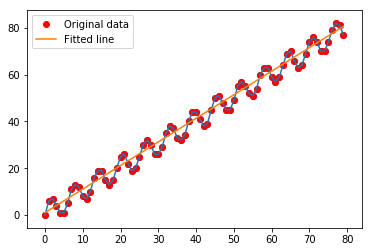

In [7]:
visualize(*(final_parameter + data_maker()))